In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/goldstock.csv')
df.head()

Unnamed: 0        Date   Close    Volume    Open    High     Low
0           0  2024-01-19  2029.3  166078.0  2027.4  2041.9  2022.2
1           1  2024-01-18  2021.6  167013.0  2009.1  2025.6  2007.7
2           2  2024-01-17  2006.5  245194.0  2031.7  2036.1  2004.6
3           3  2024-01-16  2030.2  277995.0  2053.4  2062.8  2027.6
4           4  2024-01-12  2051.6  250946.0  2033.2  2067.3  2033.1

In [3]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

Date   Close    Volume    Open    High     Low
0  2024-01-19  2029.3  166078.0  2027.4  2041.9  2022.2
1  2024-01-18  2021.6  167013.0  2009.1  2025.6  2007.7
2  2024-01-17  2006.5  245194.0  2031.7  2036.1  2004.6
3  2024-01-16  2030.2  277995.0  2053.4  2062.8  2027.6
4  2024-01-12  2051.6  250946.0  2033.2  2067.3  2033.1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2511 non-null   object 
 1   Close   2511 non-null   float64
 2   Volume  2511 non-null   float64
 3   Open    2511 non-null   float64
 4   High    2511 non-null   float64
 5   Low     2511 non-null   float64
dtypes: float64(5), object(1)
memory usage: 117.8+ KB


In [5]:
# covert date column to dat time format
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2511 non-null   datetime64[ns]
 1   Close   2511 non-null   float64       
 2   Volume  2511 non-null   float64       
 3   Open    2511 non-null   float64       
 4   High    2511 non-null   float64       
 5   Low     2511 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 117.8 KB


In [7]:
df.head()

Date   Close    Volume    Open    High     Low
0 2024-01-19  2029.3  166078.0  2027.4  2041.9  2022.2
1 2024-01-18  2021.6  167013.0  2009.1  2025.6  2007.7
2 2024-01-17  2006.5  245194.0  2031.7  2036.1  2004.6
3 2024-01-16  2030.2  277995.0  2053.4  2062.8  2027.6
4 2024-01-12  2051.6  250946.0  2033.2  2067.3  2033.1

In [8]:
# set date as index
df.set_index('Date', inplace=True)

In [9]:
df.head()

Close    Volume    Open    High     Low
Date                                                
2024-01-19  2029.3  166078.0  2027.4  2041.9  2022.2
2024-01-18  2021.6  167013.0  2009.1  2025.6  2007.7
2024-01-17  2006.5  245194.0  2031.7  2036.1  2004.6
2024-01-16  2030.2  277995.0  2053.4  2062.8  2027.6
2024-01-12  2051.6  250946.0  2033.2  2067.3  2033.1

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2511 entries, 2024-01-19 to 2014-01-22
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2511 non-null   float64
 1   Volume  2511 non-null   float64
 2   Open    2511 non-null   float64
 3   High    2511 non-null   float64
 4   Low     2511 non-null   float64
dtypes: float64(5)
memory usage: 117.7 KB


In [11]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

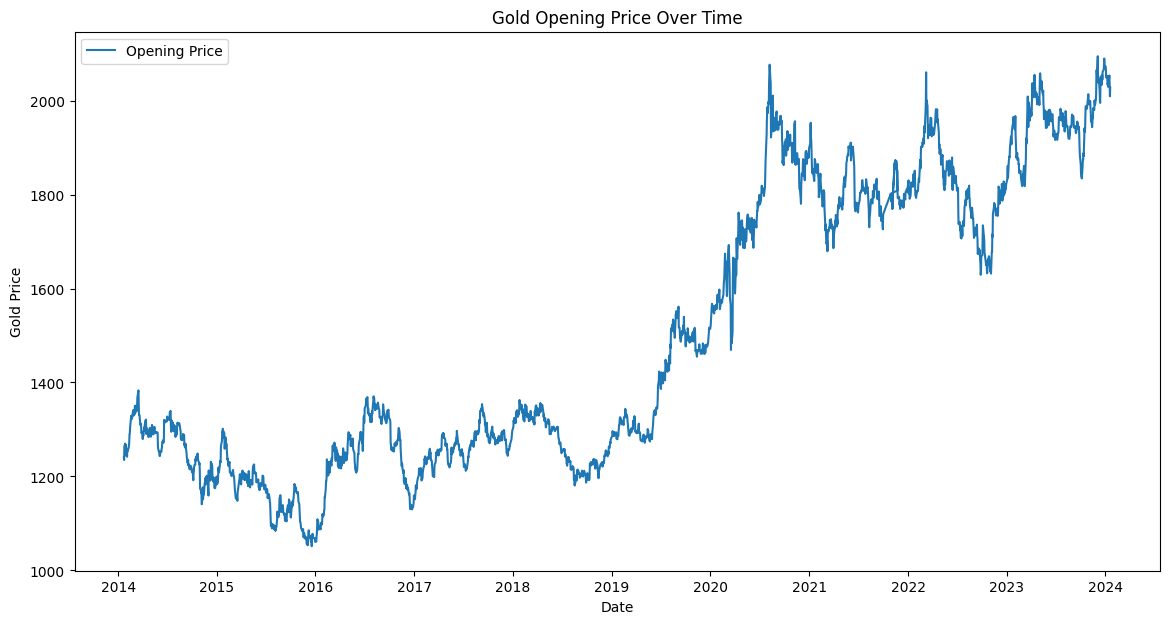

In [13]:
plt.figure(figsize=(14,7))
plt.plot(df['Open'], label='Opening Price')
plt.title('Gold Opening Price Over Time')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

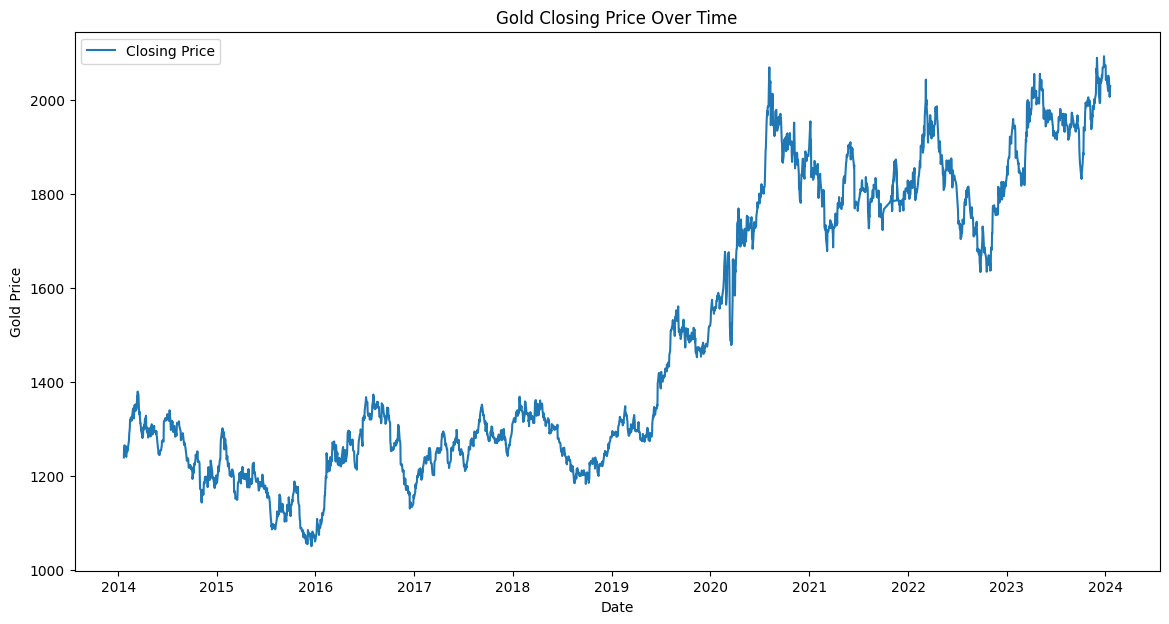

In [12]:
plt.figure(figsize=(14,7))
plt.plot(df['Close'], label='Closing Price')
plt.title('Gold Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

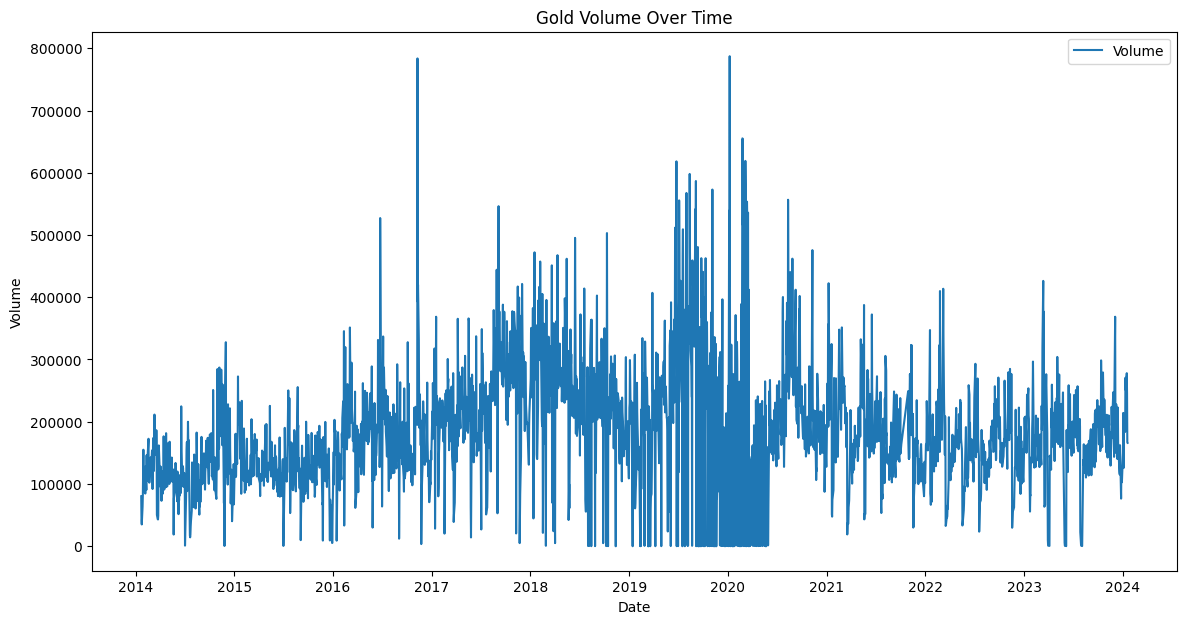

In [14]:
plt.figure(figsize=(14,7))
plt.plot(df['Volume'], label='Volume')
plt.title('Gold Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

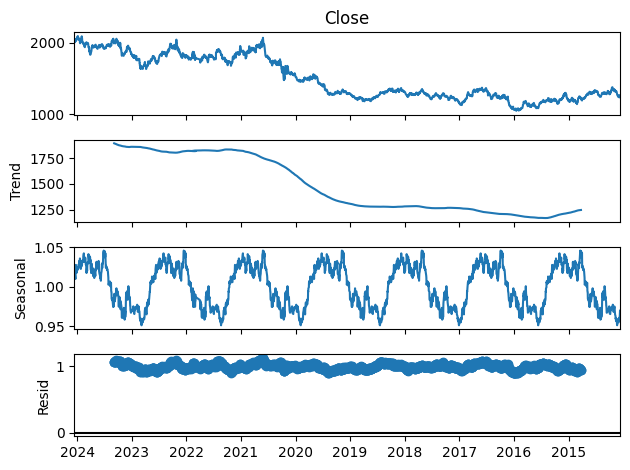

In [16]:
# seaasonal_decompose a statistical technique that breaks down a time series into three components: trend, seasonality, and residual.
from statsmodels.tsa.seasonal import seasonal_decompose     
decomposition = seasonal_decompose(df['Close'], model ='multiplicative', period=365)
decomposition.plot()
plt.show()

In [19]:
from sklearn.model_selection import train_test_split

# Assuming df['Close'] is a pandas Series
train, test = train_test_split(df['Close'], test_size=0.2, shuffle=False)

print("Train size:", len(train))
print("Test size:",len(test))

Train size: 2008
Test size: 503


### ARIMA Order (p, d, q) 

The ARIMA model is represented as ARIMA(p, d, q), where:

* p (AutoRegressive order): Number of lag observations in the model (from PACF plot).
* d (Differencing order): Number of times data is differenced to make it stationary (from ADF test).
* q (Moving Average order): Number of lagged forecast errors in the model (from ACF plot).

In [21]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit() 

C:\Users\MAK TECH\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MAK TECH\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MAK TECH\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MAK TECH\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MAK TECH\Anac

* p = 5: This means we're using the last 5 lagged values (previous observations) to predict the next value. This value is typically chosen based on the Partial Autocorrelation Function (PACF) plot.
* d = 1: This indicates that the data was differenced once to make it stationary. We determine d by checking for stationarity using the Augmented Dickey-Fuller (ADF) test.
* q = 0: This means we are not using past error terms. This is typically chosen based on the Autocorrelation Function (ACF) plot

In [23]:
forecast = model_fit.forecast(steps=len(test))
test.index = forecast.index       # ensure test and forecast indices match

C:\Users\MAK TECH\Anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [26]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test, forecast)
rmse= np.sqrt(mse)
print('MSE:', mse)
print('RMSE:', rmse)

MSE: 18462.50127821731
RMSE: 135.8767871206017


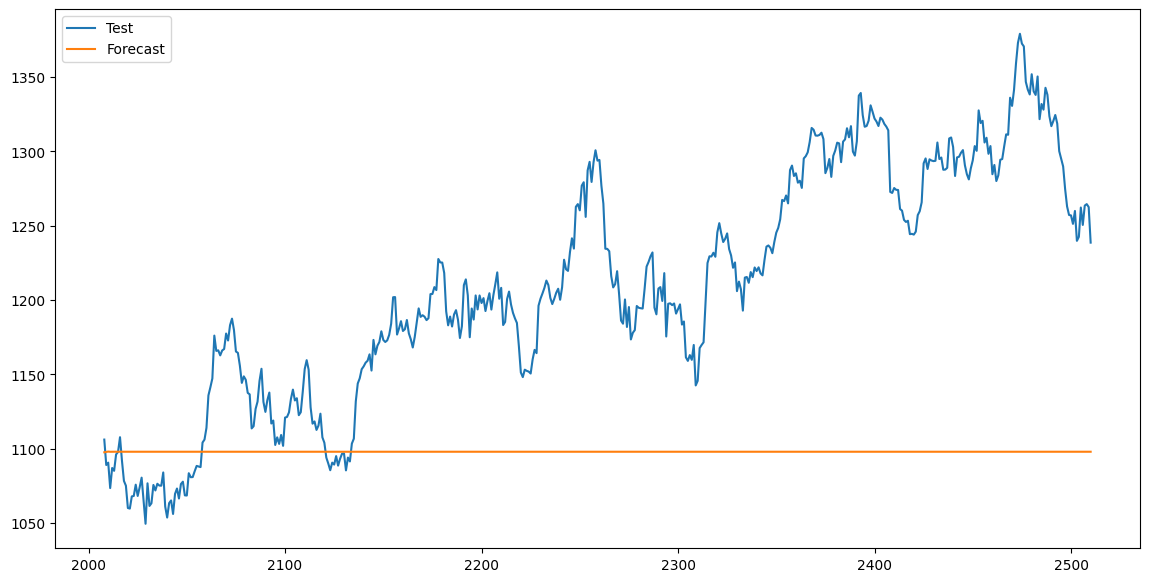

In [30]:
plt.figure(figsize=(14,7))
plt.plot(test, label='Test')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()

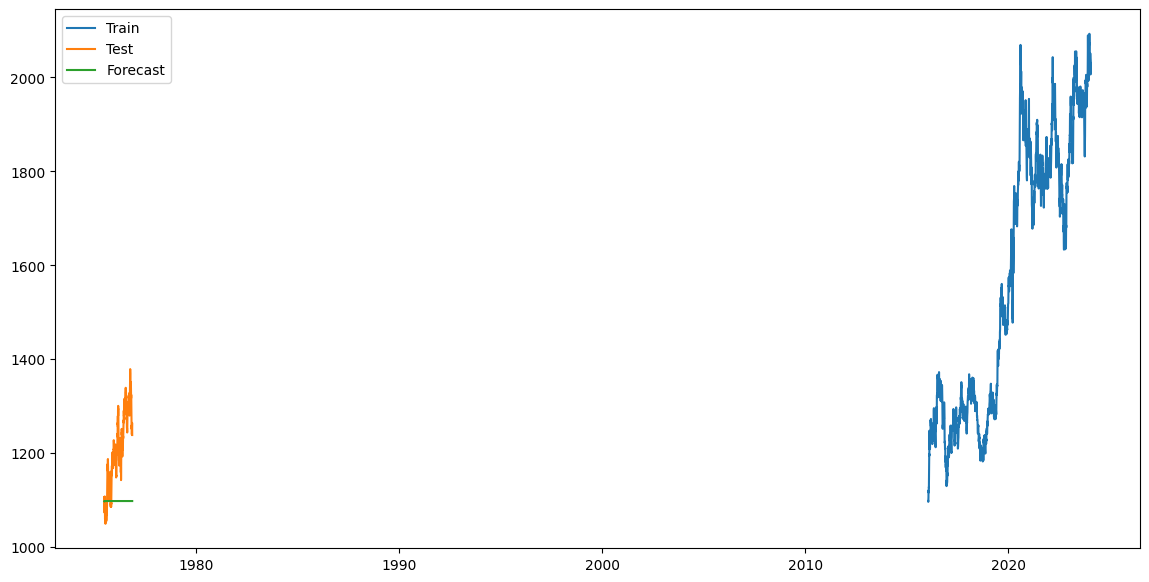

In [29]:
plt.figure(figsize=(14,7))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()